In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import os
import seaborn 
seaborn.set_context('talk')
seaborn.set_palette('bright')

from code_10_eccomas import *
import library.misc.io as io

In [2]:
def crop_ghosts(X, Q, Qaux, T):
    return {"X": X[:-2], "Q": Q[:, :, :-2], "Qaux": Qaux[:, :, :-2], "T": T}

In [10]:
main_dir = os.getenv("SMS")
output_dir = os.path.join(main_dir, 'outputs/eccomas')
experiments = {}

SMM(level=0)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-0/Simulation.h5'))
experiments["SMM-0"] = crop_ghosts(X, Q, Qaux, T)

SMM(level=1)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-1/Simulation.h5'))
experiments["SMM-1"] = crop_ghosts(X, Q, Qaux, T)

SMM(level=2)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-2/Simulation.h5'))
experiments["SMM-2"] = crop_ghosts(X, Q, Qaux, T)

SMM(level=4)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-4/Simulation.h5'))
experiments["SMM-4"] = crop_ghosts(X, Q, Qaux, T)

# SMMWS(level=0)
# X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMMWS-0/Simulation.h5'))
# experiments["SMMWS-0"] = crop_ghosts(X, Q, Qaux, T)

# SMMWS(level=1)
# X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMMWS-1/Simulation.h5'))
# experiments["SMMWS-1"] = crop_ghosts(X, Q, Qaux, T)

# SMMWS(level=2)
# X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMMWS-2/Simulation.h5'))
# experiments["SMMWS-2"] = crop_ghosts(X, Q, Qaux, T)

# SMMWS(level=6)
# X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMMWS-6/Simulation.h5'))
# experiments["SMMWS-6"] = crop_ghosts(X, Q, Qaux, T)

SSF()
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SSF/Simulation.h5'))
experiments["SSF"] = crop_ghosts(X, Q, Qaux, T)

# SSFPathconservative()


1 0.09086737992230741 0.09086737992230741------------------------ 
2 0.18173475984461482 0.09086737992230741
3 0.2726021397669222 0.09086737992230741
4 0.36346951968922964 0.09086737992230741
5 0.45433689961153706 0.09086737992230741
6 0.5452042795338444 0.09086737992230741
7 0.6360716594561518 0.09086737992230741
8 0.7269390393784593 0.09086737992230741
9 0.8178064193007667 0.09086737992230741
10 0.9086737992230741 0.09086737992230741
11 0.9995411791453815 0.09086737992230741
12 1.0904085590676889 0.09086737992230741
13 1.1812759389899963 0.09086737992230741
14 1.2721433189123037 0.09086737992230741
15 1.3630106988346111 0.09086737992230741
16 1.4538780787569185 0.09086737992230741
17 1.5000000001 0.046121921343081455
Runtime: 0.5634915828704834

1 0.09086737992230741 0.09086737992230741------------------------ 
2 0.1815172848450211 0.0906499049227137
3 0.2719516534986194 0.0904343686535983
4 0.3621731605785794 0.09022150707996003
5 0.4521851960185675 0.09001203543998808
6 0.541991842

In [4]:
def compute_P(Q):
    h = Q[0]
    a = Q[1:] / h
    basis = Legendre_shifted(order=10)
    res = np.zeros_like(h)
    for i in range(res.shape[0]):
        _h = h[i]
        _um = Q[1, i]/_h
        _a = a[:, i]
        _u = lambda z: np.sum([c * basis.eval(ic, z) for ic, c in enumerate(_a)])
        res[i] = _h * quad(lambda z: (_u(z)-_um)**2, 0, 1)[0]
    return res

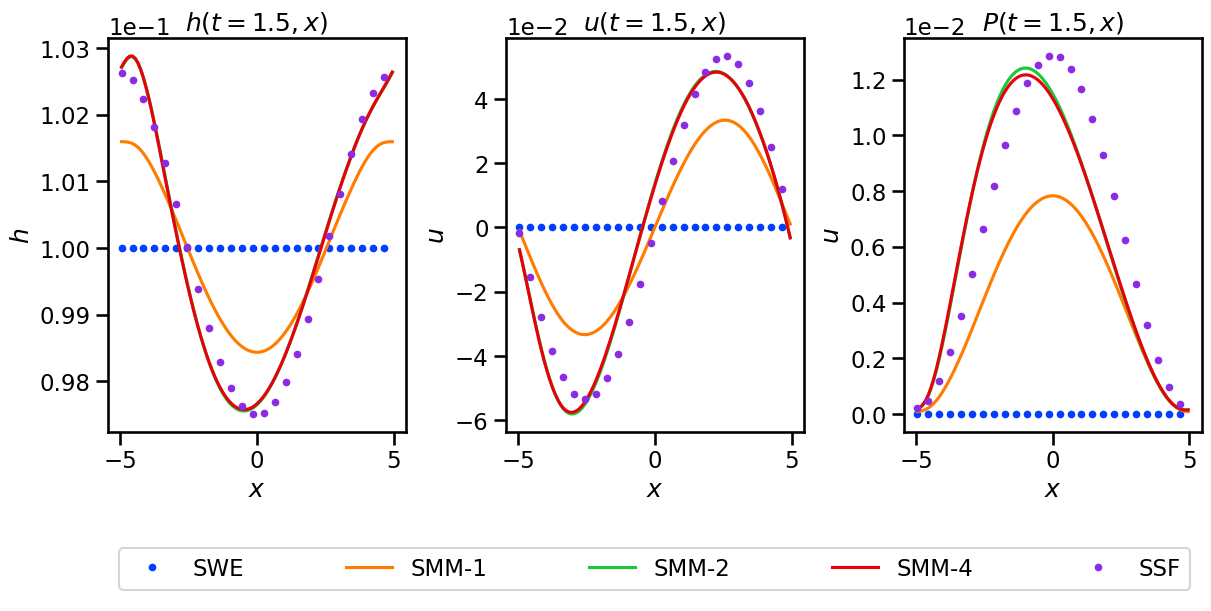

In [5]:
fig = plt.figure(constrained_layout=True, figsize=(12, 6))
ax = fig.subplot_mosaic(
    [[0, 1, 2], ["legend", "legend", "legend"]],
    # per_subplot_kw={
    #     0: {"box_aspect": 0.6},
    #     1: {"box_aspect": 0.6},
    #     2: {"box_aspect": 1.0},
        # 3: {"box_aspect": 0.6},
    # },
    height_ratios=[1.3, 0.3],
)

ax[0].set_title('$h(t=1.5, x)$')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$h$')
ax[1].set_title('$u(t=1.5, x)$')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$u$')
ax[2].set_title('$P(t=1.5, x)$')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$u$')

experiment_names = experiments.keys()
markers = ['.', '', '', '', '.', '']
lines =['', '-', '-', '-', '']
for i, name in enumerate(experiment_names):
    label = name
    if  name == 'SMM-0':
        label = 'SWE'
    Q0 = experiments[name]['Q'][0,:, :]
    Q = experiments[name]['Q'][-1,:, :]
    X = experiments[name]['X']
    h = Q[0]
    u = Q[1] / h
    if name == 'SSF':
        P0 = Q0[2]
        P1 = Q[2]
    else:
        P0 = compute_P(Q0)
        P1 = compute_P(Q)
    if label=='SWE' or label=='SSF':
        ax[0].plot(X[::4], h[::4], label=label, linestyle=lines[i],  marker=markers[i])
        ax[1].plot(X[::4], u[::4], label=label, linestyle=lines[i],  marker=markers[i])
        ax[2].plot(X[::4], P1[::4], label=label, linestyle=lines[i],  marker=markers[i])
    else:
        ax[0].plot(X, h, label=label, linestyle=lines[i],  marker=markers[i])
        ax[1].plot(X, u, label=label, linestyle=lines[i],  marker=markers[i])
        ax[2].plot(X, P1, label=label, linestyle=lines[i],  marker=markers[i])

handles, labels = ax[0].get_legend_handles_labels()
ax['legend'].legend(handles, labels, ncol=6, mode="expand", loc='lower left')
ax["legend"].axis("off")

for i in range(3): 
    ax[i].ticklabel_format(style='sci', scilimits=(0, 10))

fig.savefig('TC1.png')


In [6]:

main_dir = os.getenv("SMS")
output_dir = os.path.join(main_dir, 'outputs/eccomas')
experiments = {}

SMM(level=0, exp=2)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-0/Simulation.h5'))
experiments["SMM-0"] = crop_ghosts(X, Q, Qaux, T)

SMM(level=1, exp=2)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-1/Simulation.h5'))
experiments["SMM-1"] = crop_ghosts(X, Q, Qaux, T)

SMM(level=2, exp=2)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-2/Simulation.h5'))
experiments["SMM-2"] = crop_ghosts(X, Q, Qaux, T)

SMM(level=4, exp=2)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-4/Simulation.h5'))
experiments["SMM-4"] = crop_ghosts(X, Q, Qaux, T)

SSF(exp=2)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SSF/Simulation.h5'))
experiments["SSF"] = crop_ghosts(X, Q, Qaux, T)


1 0.060384267720634155 0.060384267720634155---------------------- 
2 0.12076853544126831 0.060384267720634155
3 0.18115280316190246 0.060384267720634155
4 0.24153707088253662 0.060384267720634155
5 0.3019213386031708 0.060384267720634155
6 0.36230560632380493 0.060384267720634155
7 0.4226898740444391 0.060384267720634155
8 0.48307414176507324 0.060384267720634155
9 0.5434584094857073 0.060384267720634155
10 0.6038426772063414 0.060384267720634155
11 0.6642269449269755 0.060384267720634155
12 0.7246112126476096 0.060384267720634155
13 0.7849954803682437 0.060384267720634155
14 0.8453797480888778 0.060384267720634155
15 0.9057640158095119 0.060384267720634155
16 0.966148283530146 0.060384267720634155
17 1.0000000001 0.03385171656985397
Runtime: 0.020420551300048828

1 0.060384267720634155 0.060384267720634155---------------------- 
2 0.12076853544126831 0.060384267720634155
3 0.18115280316190246 0.060384267720634155
4 0.24153707088253662 0.060384267720634155
5 0.3019213386031708 0.060384

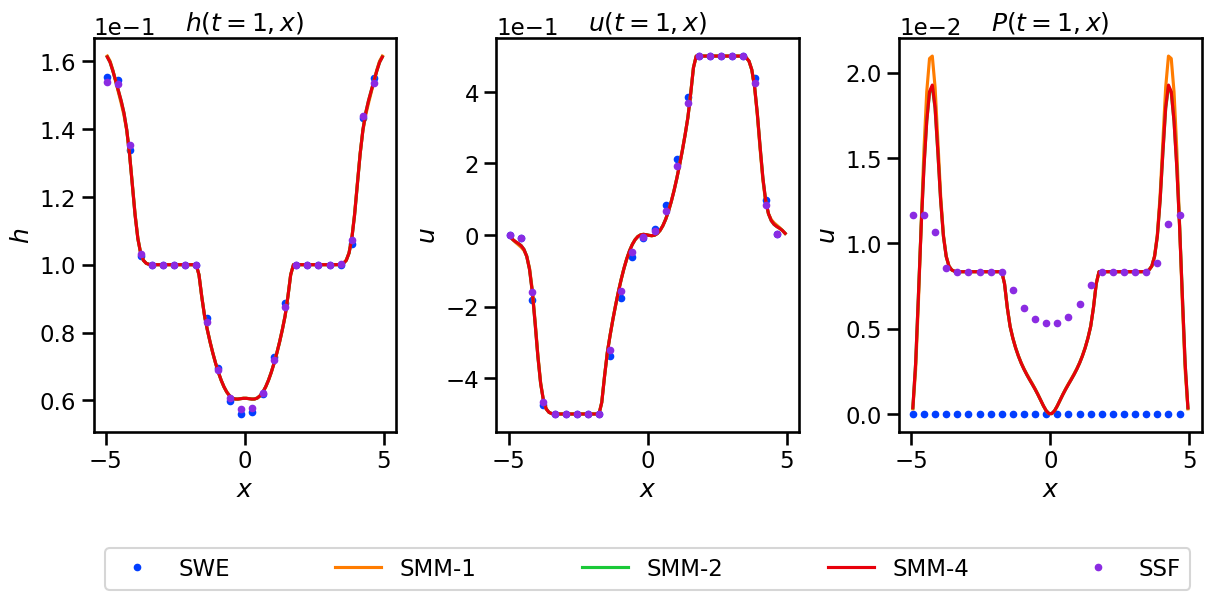

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(12, 6))
ax = fig.subplot_mosaic(
    [[0, 1, 2], ["legend", "legend", "legend"]],
    # per_subplot_kw={
    #     0: {"box_aspect": 0.6},
    #     1: {"box_aspect": 0.6},
    #     2: {"box_aspect": 1.0},
        # 3: {"box_aspect": 0.6},
    # },
    height_ratios=[1.3, 0.3],
)

ax[0].set_title('$h(t=1, x)$')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$h$')
ax[1].set_title('$u(t=1, x)$')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$u$')
ax[2].set_title('$P(t=1, x)$')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$u$')

experiment_names = experiments.keys()
markers = ['.', '', '', '', '.', '']
lines =['', '-', '-', '-', '']
for i, name in enumerate(experiment_names):
    label = name
    if  name == 'SMM-0':
        label = 'SWE'
    Q0 = experiments[name]['Q'][0,:, :]
    Q = experiments[name]['Q'][-1,:, :]
    X = experiments[name]['X']
    h = Q[0]
    u = Q[1] / h
    if name == 'SSF':
        P0 = Q0[2]
        P1 = Q[2]
    else:
        P0 = compute_P(Q0)
        P1 = compute_P(Q)
    if label=='SWE' or label=='SSF':
        ax[0].plot(X[::4], h[::4], label=label, linestyle=lines[i],  marker=markers[i])
        ax[1].plot(X[::4], u[::4], label=label, linestyle=lines[i],  marker=markers[i])
        ax[2].plot(X[::4], P1[::4], label=label, linestyle=lines[i],  marker=markers[i])
    else:
        ax[0].plot(X, h, label=label, linestyle=lines[i],  marker=markers[i])
        ax[1].plot(X, u, label=label, linestyle=lines[i],  marker=markers[i])
        ax[2].plot(X, P1, label=label, linestyle=lines[i],  marker=markers[i])

handles, labels = ax[0].get_legend_handles_labels()
ax['legend'].legend(handles, labels, ncol=6, mode="expand", loc='lower left')
ax["legend"].axis("off")

for i in range(3): 
    ax[i].ticklabel_format(style='sci', scilimits=(0, 10))

fig.savefig('TC2.png')

In [8]:


main_dir = os.getenv("SMS")
output_dir = os.path.join(main_dir, 'outputs/eccomas')
experiments = {}

SMM(level=0, exp=3)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-0/Simulation.h5'))
experiments["SMM-0"] = crop_ghosts(X, Q, Qaux, T)

SMM(level=1, exp=3)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-1/Simulation.h5'))
experiments["SMM-1"] = crop_ghosts(X, Q, Qaux, T)

SMM(level=2, exp=3)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-2/Simulation.h5'))
experiments["SMM-2"] = crop_ghosts(X, Q, Qaux, T)

SMM(level=4, exp=3)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SMM-4/Simulation.h5'))
experiments["SMM-4"] = crop_ghosts(X, Q, Qaux, T)

SSF(exp=3)
X, Q, Qaux, T = io.load_timeline_of_fields_from_hdf5(os.path.join(output_dir, 'SSF/Simulation.h5'))
experiments["SSF"] = crop_ghosts(X, Q, Qaux, T)


1 0.09086737992230741 0.09086737992230741------------------------ 
2 0.18173475984461482 0.09086737992230741
3 0.2726021397669222 0.09086737992230741
4 0.36346951968922964 0.09086737992230741
5 0.45433689961153706 0.09086737992230741
6 0.5452042795338444 0.09086737992230741
7 0.6360716594561518 0.09086737992230741
8 0.7269390393784593 0.09086737992230741
9 0.8178064193007667 0.09086737992230741
10 0.9086737992230741 0.09086737992230741
11 0.9995411791453815 0.09086737992230741
12 1.0904085590676889 0.09086737992230741
13 1.1812759389899963 0.09086737992230741
14 1.2721433189123037 0.09086737992230741
15 1.3630106988346111 0.09086737992230741
16 1.4538780787569185 0.09086737992230741
17 1.544745458679226 0.09086737992230741
18 1.6356128386015334 0.09086737992230741
19 1.7264802185238408 0.09086737992230741
20 1.8173475984461482 0.09086737992230741
21 1.9082149783684557 0.09086737992230741
22 1.999082358290763 0.09086737992230741
23 2.0899497382130705 0.09086737992230741
24 2.18081711813

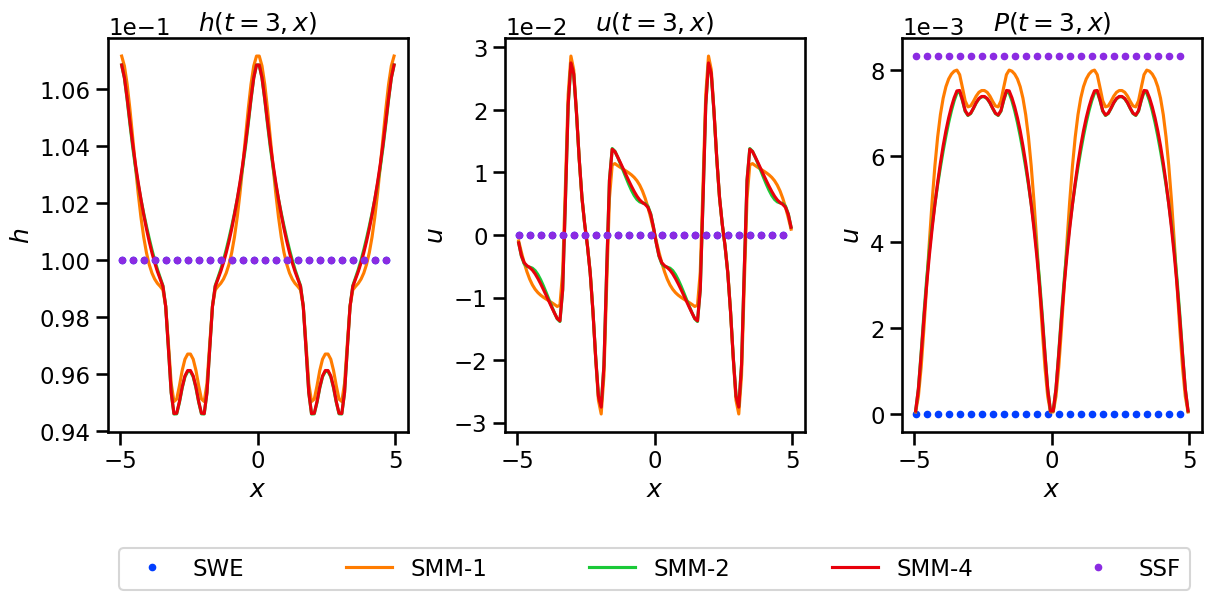

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(12, 6))
ax = fig.subplot_mosaic(
    [[0, 1, 2], ["legend", "legend", "legend"]],
    # per_subplot_kw={
    #     0: {"box_aspect": 0.6},
    #     1: {"box_aspect": 0.6},
    #     2: {"box_aspect": 1.0},
        # 3: {"box_aspect": 0.6},
    # },
    height_ratios=[1.3, 0.3],
)

ax[0].set_title('$h(t=3, x)$')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$h$')
ax[1].set_title('$u(t=3, x)$')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$u$')
ax[2].set_title('$P(t=3, x)$')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$u$')

experiment_names = experiments.keys()
markers = ['.', '', '', '', '.', '']
lines =['', '-', '-', '-', '']
for i, name in enumerate(experiment_names):
    label = name
    if  name == 'SMM-0':
        label = 'SWE'
    Q0 = experiments[name]['Q'][0,:, :]
    Q = experiments[name]['Q'][-1,:, :]
    X = experiments[name]['X']
    h = Q[0]
    u = Q[1] / h
    if name == 'SSF':
        P0 = Q0[2]
        P1 = Q[2]
    else:
        P0 = compute_P(Q0)
        P1 = compute_P(Q)
    if label=='SWE' or label=='SSF':
        ax[0].plot(X[::4], h[::4], label=label, linestyle=lines[i],  marker=markers[i])
        ax[1].plot(X[::4], u[::4], label=label, linestyle=lines[i],  marker=markers[i])
        ax[2].plot(X[::4], P1[::4], label=label, linestyle=lines[i],  marker=markers[i])
    else:
        ax[0].plot(X, h, label=label, linestyle=lines[i],  marker=markers[i])
        ax[1].plot(X, u, label=label, linestyle=lines[i],  marker=markers[i])
        ax[2].plot(X, P1, label=label, linestyle=lines[i],  marker=markers[i])

handles, labels = ax[0].get_legend_handles_labels()
ax['legend'].legend(handles, labels, ncol=6, mode="expand", loc='lower left')
ax["legend"].axis("off")

for i in range(3): 
    ax[i].ticklabel_format(style='sci', scilimits=(0, 10))


fig.savefig('TC3.png')
